Ordia pageview statistics
===========================

This notebook will show the Toolforge pageview statistics of Ordia.
The pageviews are detemined through an API call to the "toolviews" Toolforge tool.

In [1]:
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url_pattern = "https://toolviews.toolforge.org/api/v1/tool/ordia/daily/{}/{}"

In [3]:
now = datetime.now().isoformat()
start_date = "2019-01-28"
end_date = now[:10]

In [4]:
url = url_pattern.format(start_date, end_date)

In [5]:
response = requests.get(url)

In [6]:
response.ok

True

In [7]:
data = [(key, value['ordia']) for key, value in sorted(response.json()['results'].items())]
df = pd.DataFrame(data, columns=['date', 'page views'])
df = df.set_index('date')

In [8]:
df

,page views
date,
2019-01-28,440
2019-01-29,302
2019-01-30,455
2019-01-31,109
2019-02-01,147
...,...
2020-10-31,522
2020-11-01,235
2020-11-02,210


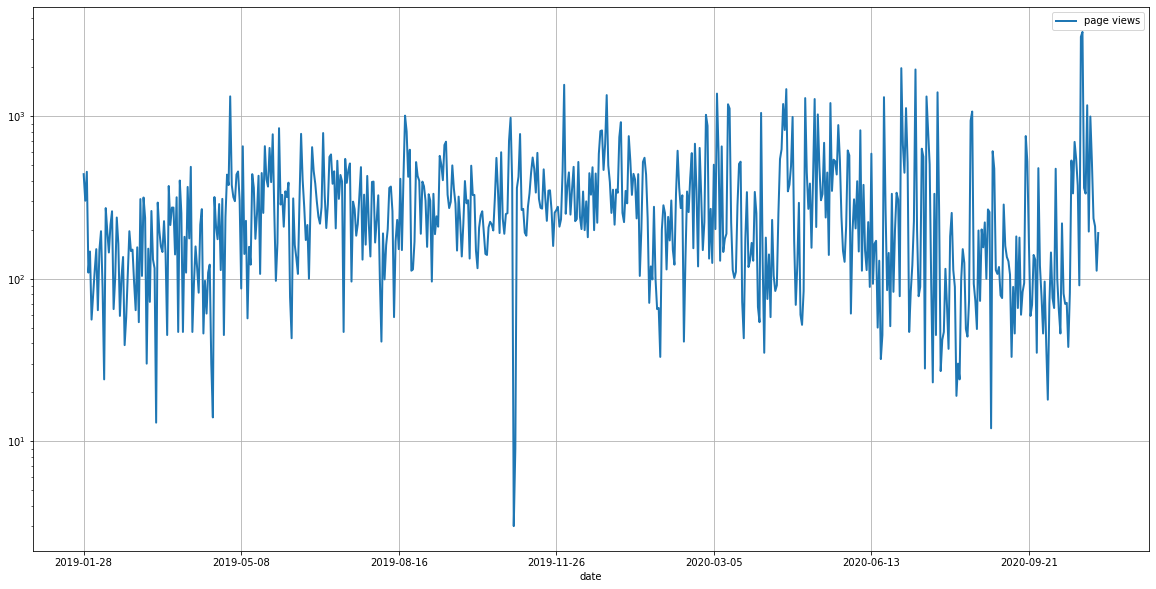

In [9]:
ax = df.plot(figsize=(20, 10), logy=True, linewidth=2)
ax.grid()
plt.show()

In [10]:
png_filename = 'ordia-pageviews-' + now[:10] + ".png"

In [11]:
ax.get_figure().savefig(png_filename)